# SpatialTis: Python library for spatial analysis in multiplexed tissue imaging

SpatialTis use `annData`, so you can also use `Scanpy` for your analysis

Here is an example of analysis with `SpatialTis` and `Scanpy`

In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import scanpy as sc
from pathlib import Path
import matplotlib.pyplot as plt
from time import time

from spatialTis import read_ROI, read_all_ROIs

import anndata as ad

## Preprocessing
Mask, Channel Stack ---> Matrix

In [2]:
# this is the direcotry to example data
test_dir = Path().cwd() / 'part1' / 'HPAP002' / 'Head2'

# Initiate a Reader to add all file to annData object
all_rois = read_all_ROIs(test_dir, ['ROI']) \
.config_file('metadata.csv',channel_col='channels', marker_col='markers')

My dual core mac with ssd takes 10~15s each ROI.

In [3]:
data = all_rois.to_annData()

Detected 7845 cells.
Added: ROI1


In [4]:
data.var

,Channels,Markers
0,Ba138,138Ba
1,Cs133,133Cs
2,Dy161,CD20
3,Dy162,CD8
4,Dy164,CD99
5,Er166,NFkB
6,Er167,GnzB
7,Er168,Ki67
8,Er170,CD3
9,Eu151,PDX-1


## Cell PhenoTyping
We will use `scanpy` to sort cell type.

You can check [Scanpy-Tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html) for the usage and example

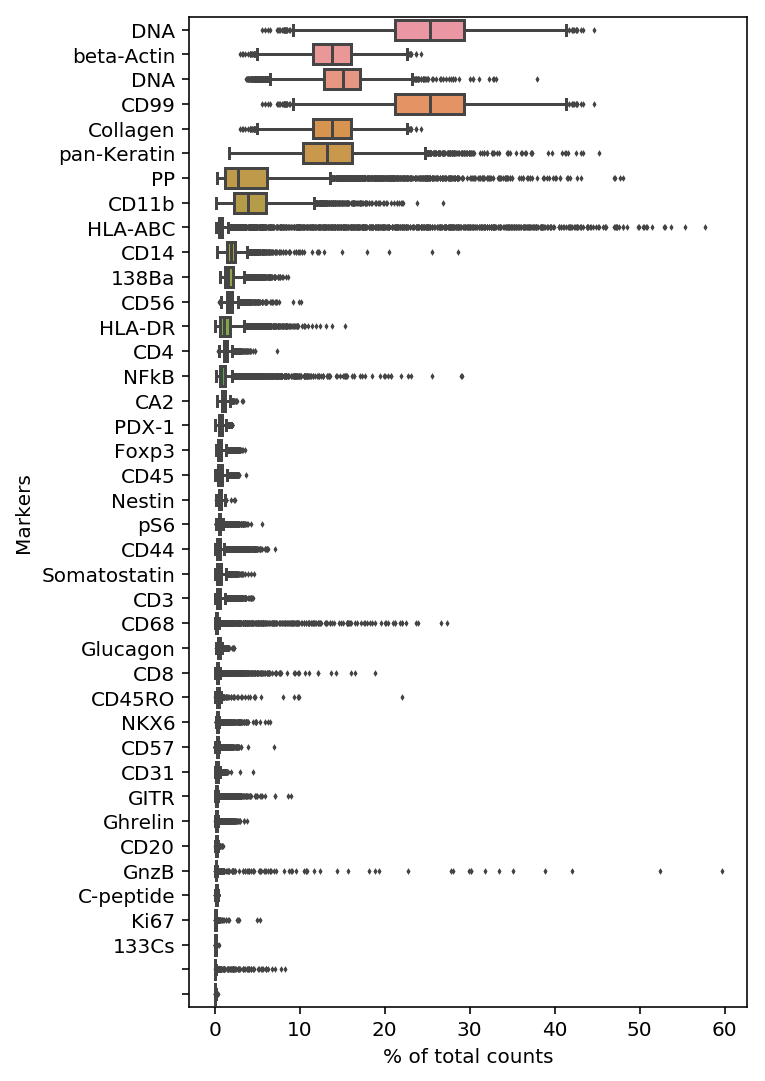

In [9]:
sc.pl.highest_expr_genes(data, n_top=38, gene_symbols='Markers')

In [12]:
sc.tl.pca(data, svd_solver='arpack')

In [14]:
data

AnnData object with n_obs × n_vars = 7845 × 38 
    obs: 'ROI', 'cell_shape'
    var: 'Channels', 'Markers'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

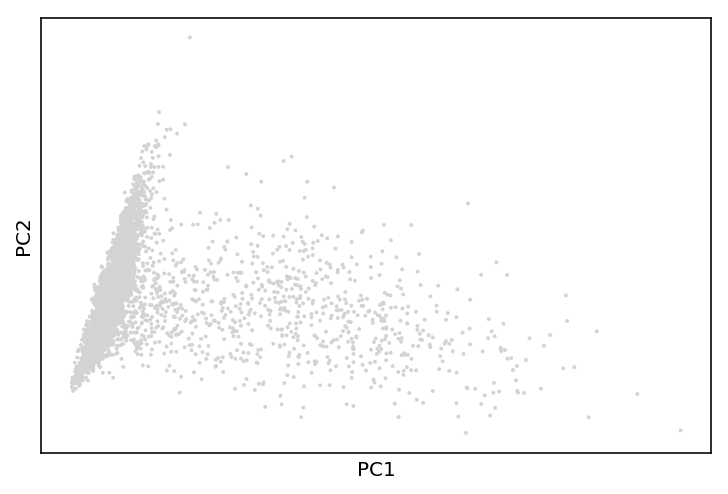

In [15]:
sc.pl.pca(data)

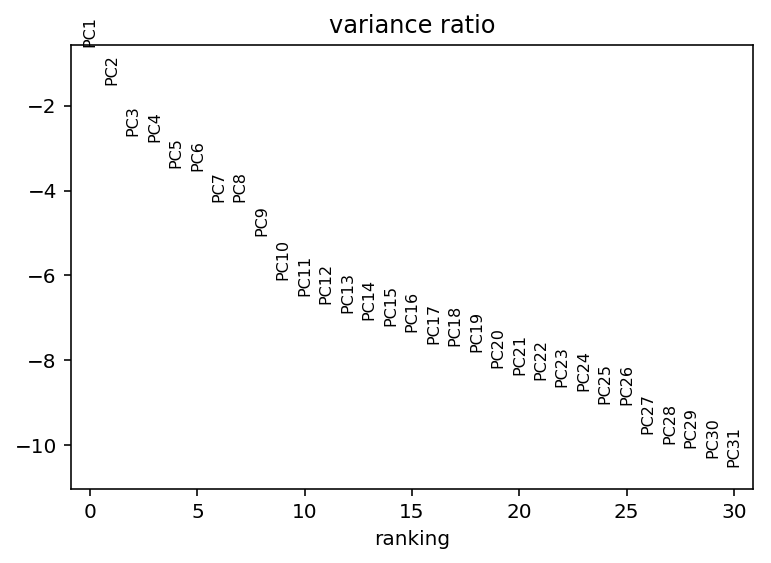

In [16]:
sc.pl.pca_variance_ratio(data, log=True)

In [43]:
sc.pp.neighbors(data, n_neighbors=50, n_pcs=20)

In [44]:
sc.tl.umap(data)

In [45]:
sc.tl.leiden(data)

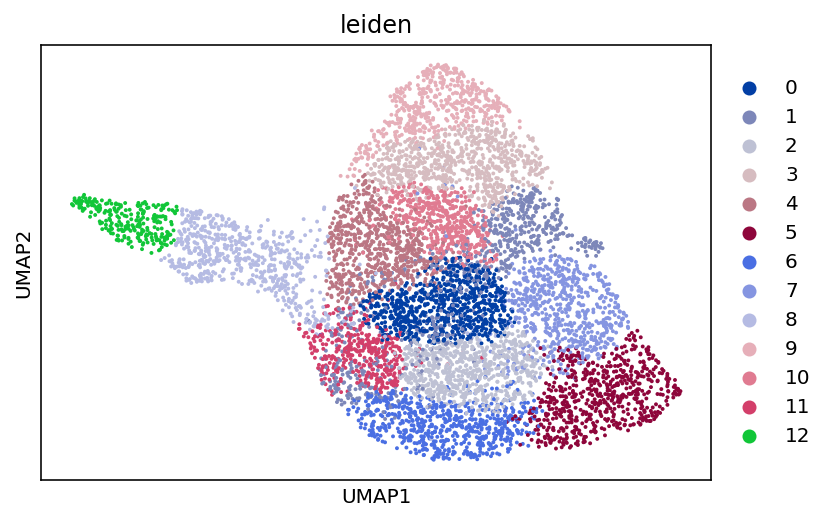

In [46]:
sc.pl.umap(data, color='leiden')
                         

/Users/milk/anaconda3/envs/tissue/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/milk/anaconda3/envs/tissue/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


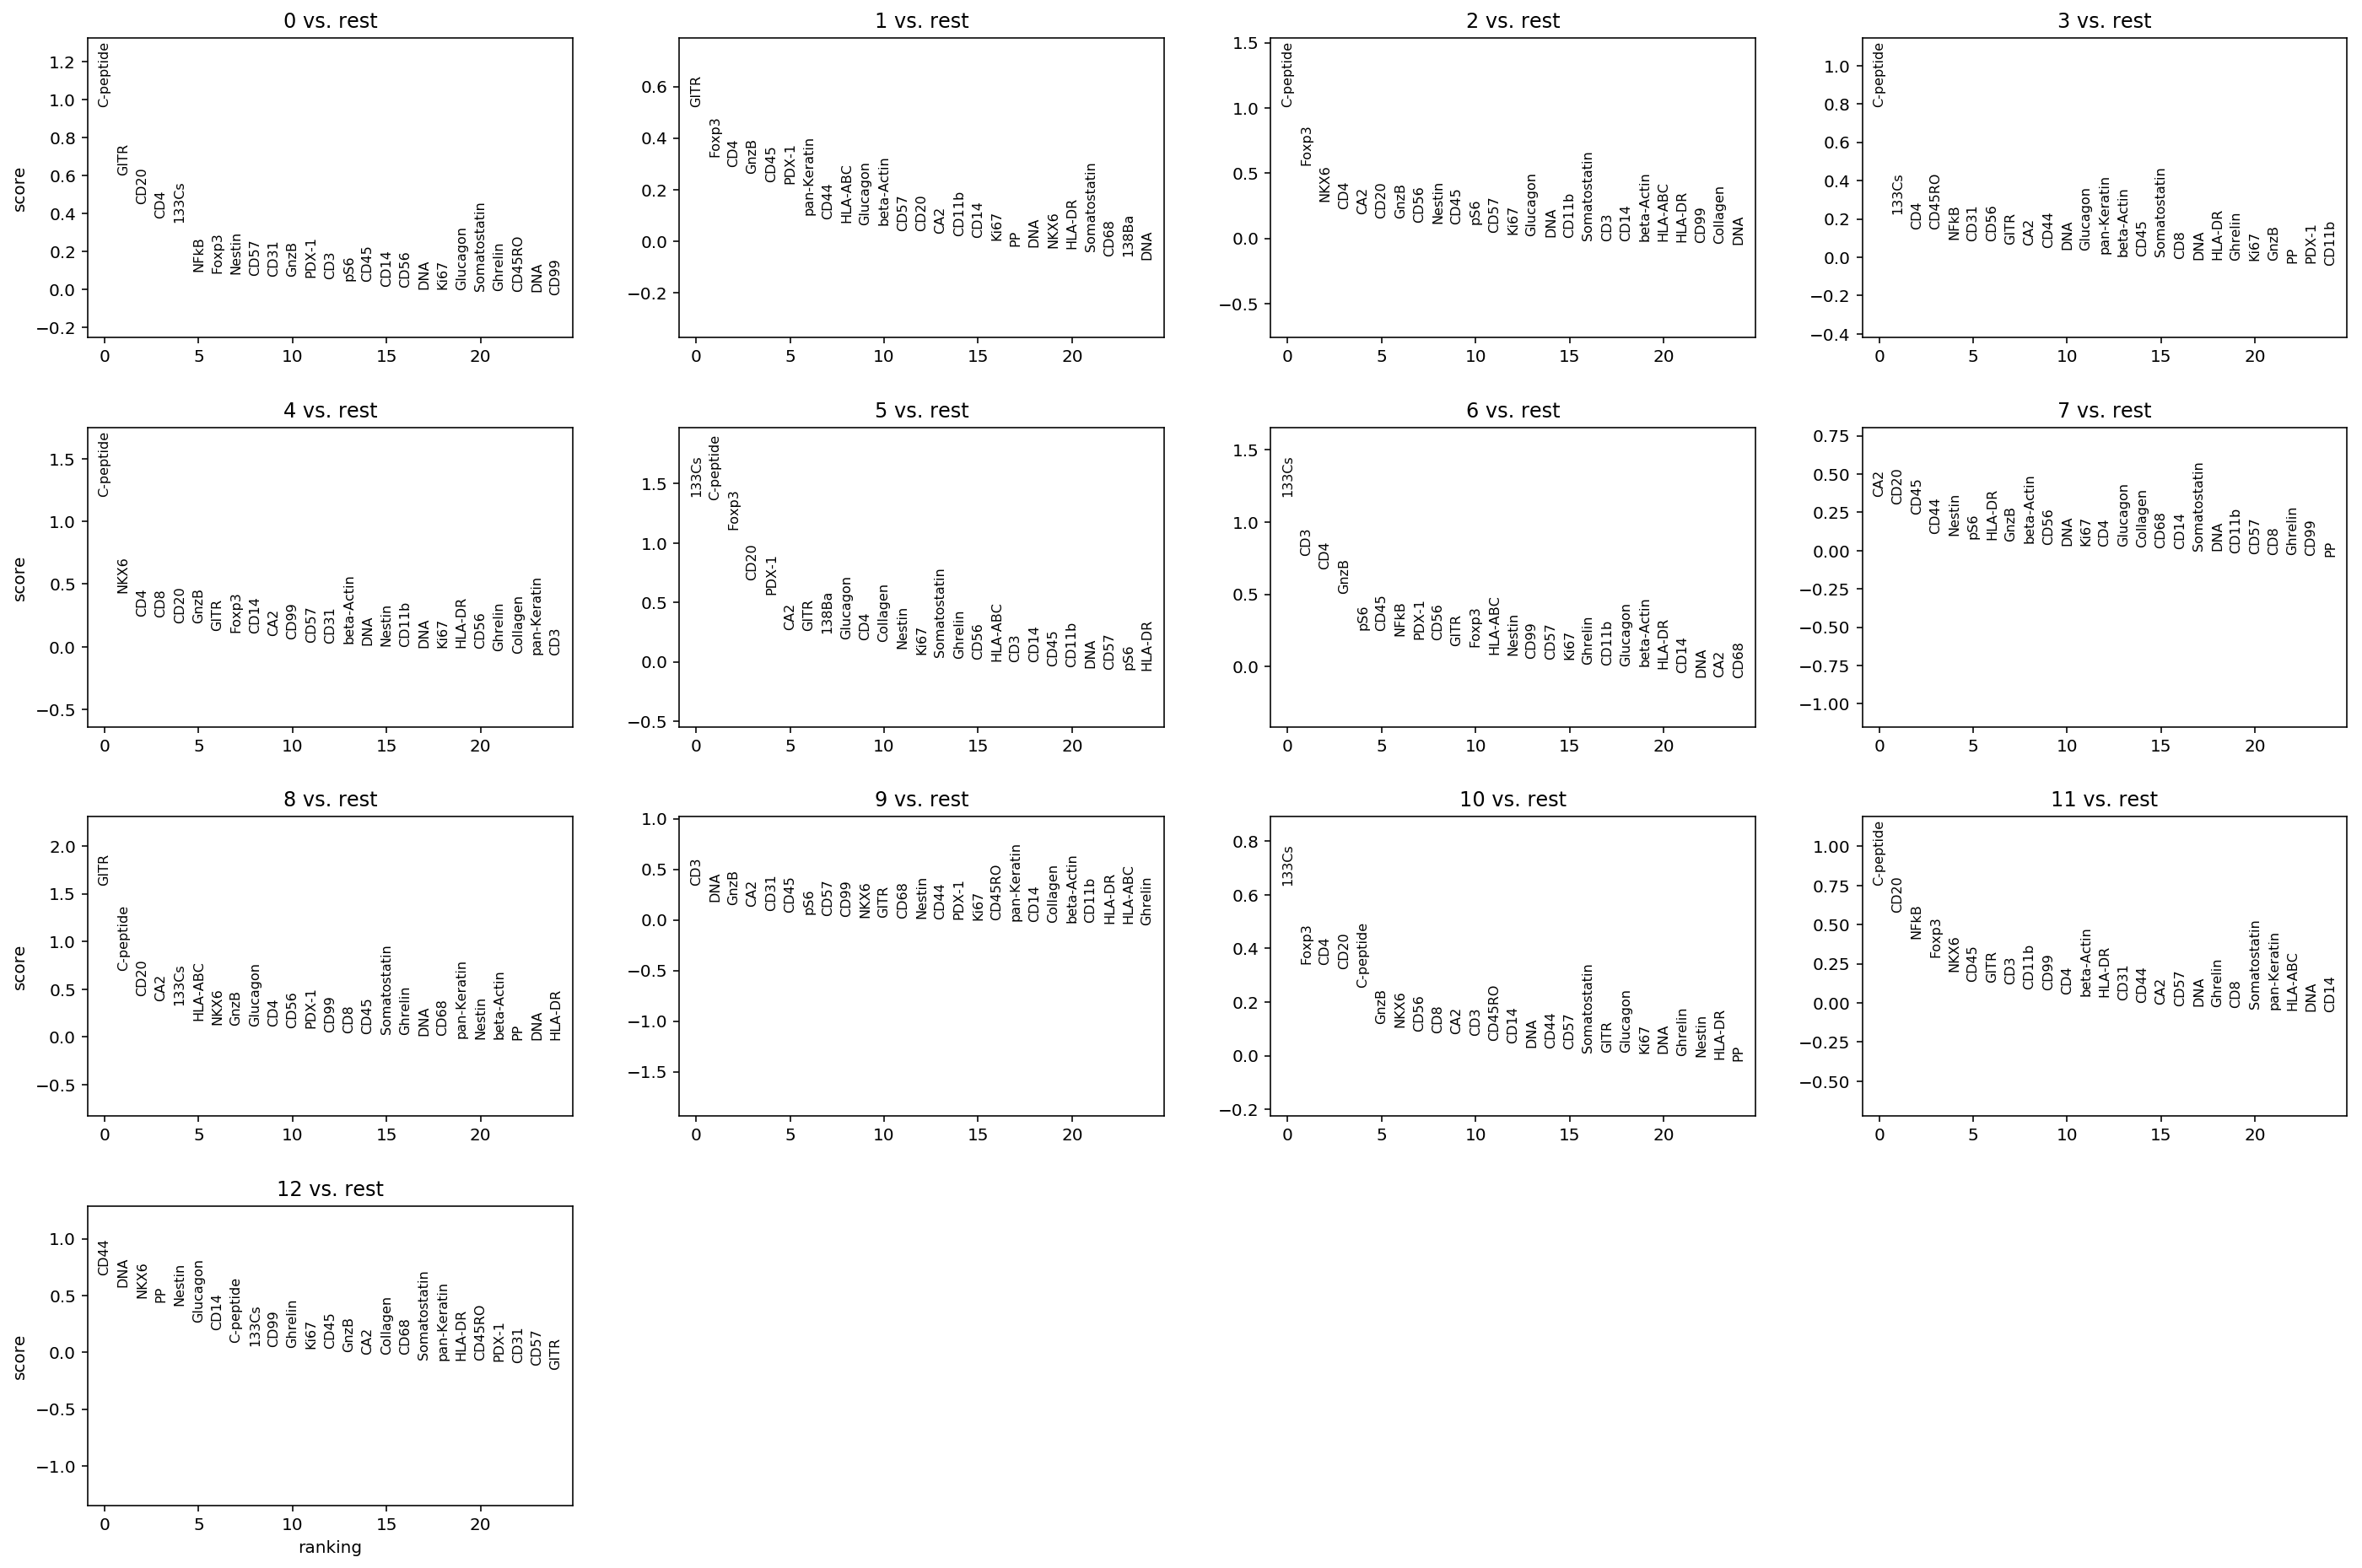

In [47]:
sc.tl.rank_genes_groups(data, 'leiden', method='logreg')
sc.pl.rank_genes_groups(data, n_genes=25, sharey=False, gene_symbols="Markers")

In [30]:
data.uns['rank_genes_groups'] 

{'params': {'groupby': 'leiden',
  'reference': 'rest',
  'method': 'logreg',
  'use_raw': True,
  'corr_method': 'benjamini-hochberg'},
 'scores': rec.array([( 0.9495972 ,  0.8467023 ,  6.6212541e-01,  1.0335293 ,  1.1964946e+00,  1.0182495 ,  0.46421763,  8.59397352e-01,  0.99499327,  0.40969983,  1.4850671e+00,  3.94747347e-01,  6.9954032e-01,  0.5676684 ,  1.0549991 ,  0.53763616,  0.42379746,  0.86969465,  0.9809484 ),
            ( 0.8598469 ,  0.53859997,  3.1006017e-01,  0.5080905 ,  7.1972489e-01,  0.9919854 ,  0.29389727,  4.87851799e-01,  0.26962343,  0.23195015,  8.1629539e-01,  2.68794596e-01,  5.2046585e-01,  0.3991676 ,  0.88973284,  0.525448  ,  0.38225368,  0.5766182 ,  0.6630627 ),
            ( 0.64039874,  0.33131135,  2.0461878e-01,  0.4563651 ,  6.4498508e-01,  0.76945484,  0.28732717,  1.71060845e-01,  0.19420415,  0.22100809,  3.5905594e-01,  1.23155624e-01,  2.7474251e-01,  0.26725936,  0.25342825,  0.4816815 ,  0.3433749 ,  0.47847655,  0.59863734),
          